<a href="https://colab.research.google.com/github/The-Lexa/Auto_price_prediction/blob/main/auto_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  🚘 Business Case:

###  Predictive Auto Pricing Using the 1985 Auto Imports Dataset

# 🎯 Business Objective

Develop a predictive pricing model that can:

Accurately estimate the price of a vehicle using technical and categorical features

Help dealerships and online platforms set competitive and fair prices

Enhance customer experience by offering data-backed pricing insights

# 1. Loading Automobile Dataset 📊

#### ✅ 1. Core Libraries for Data Handling

In [ ]:
import pandas as pd
import numpy as np

pandas is used for loading and manipulating structured data (e.g., CSV files, DataFrames).

numpy is used for numerical operations like arrays, math functions, etc.

#### ✅ 2. Data Visualization

In [ ]:
import seaborn as sns

seaborn is a visualization library based on matplotlib, used for statistical plotting (like heatmaps, boxplots, etc.)

#### ✅ 3. Data Profiling

In [ ]:
from ydata_profiling import ProfileReport

This generates an automated EDA (Exploratory Data Analysis) report, showing:

Data types

Missing values

Correlations

Distribution of each column

#### ✅ 4. Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

Tool	           Use Case
StandardScaler	Standardizes numerical values to have mean=0 and std=1 (important for models like linear regression)

LabelEncoder	Converts text categories to integers (e.g., 'BMW' → 1, 'Toyota' → 2) – for ordinal or target labels

OneHotEncoder	Converts categorical columns into binary columns (e.g., Fuel Type → Gas, Diesel)

OrdinalEncoder	Encodes categories that have an order (e.g., Low < Medium < High)

#### ✅ 5. Suppress Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Prevents clutter in the output by hiding non-critical warnings (e.g., future deprecation notices).

Note: You forgot to import warnings. Add import warnings at the top.



#### ✅ 6. Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

Imports the most basic regression model, which fits a straight line to predict a numeric value.



#### ✅ 7. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

Splits your dataset into training and testing sets so you can evaluate your model's performance on unseen data.

#### ✅ 8. Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


r2_score tells you how well your model explains the variance in the data (1.0 is perfect, 0.0 is bad).

#### ✅ 9. Advanced Regression Models

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

AdaBoostRegressor	Combines many weak learners (usually decision trees) by focusing on errors made by previous models

RandomForestRegressor	Ensemble of decision trees trained on different parts of the data; robust and widely used

GradientBoostingRegressor	Builds trees sequentially, correcting errors of previous trees; often more accurate but slower

In [ ]:
data=pd.read_csv("auto_imports.csv")

In [ ]:
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
data = pd.read_csv("auto_imports.csv",header=None,names=["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors","body_style",
         "drive_wheels","engine_location","wheel_base", "length","width","height","curb_weight","engine_type",
         "num_of_cylinders", "engine_size","fuel_system","bore","stroke","compression_ratio","horsepower",
         "peak_rpm","city_mpg","highway_mpg","price"],na_values='?')

In [ ]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


# 2.Basic Checks

In [ ]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [ ]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [ ]:
data.describe(include = "O")

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,201,201,201,199,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,113,94,118,198,145,157,92


# 3.Data Preprocessing (Cleaning) 🧹

### Handling null values

In [ ]:
null_values = data.isnull().sum()

# Loop through the null values and print column names with their null counts
for column, null_count in null_values.items():
    if null_count > 0:  # Check if there are any null values
        print(f"Column '{column}' has {null_count} null values.")

Column 'normalized_losses' has 37 null values.
Column 'num_of_doors' has 2 null values.
Column 'bore' has 4 null values.
Column 'stroke' has 4 null values.
Column 'horsepower' has 2 null values.
Column 'peak_rpm' has 2 null values.


In [ ]:
data.loc[data['normalized_losses'].isnull(),'normalized_losses']=data['normalized_losses'].median()

In [ ]:
data.loc[data['bore'].isnull(),'bore']=data['bore'].median()

In [ ]:
data.loc[data['stroke'].isnull(),'stroke']=data['stroke'].median()

In [ ]:
data.loc[data['horsepower'].isnull(),'horsepower']=data['horsepower'].median()

In [ ]:
data.loc[data['peak_rpm'].isnull(),'peak_rpm']=data['peak_rpm'].median()

In [ ]:
#replace the missing values by the most frequent value
data["num_of_doors"].fillna(data["num_of_doors"].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Handling Duplicates

In [ ]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [ ]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [symboling, normalized_losses, make, fuel_type, aspiration, num_of_doors, body_style, drive_wheels, engine_location, wheel_base, length, width, height, curb_weight, engine_type, num_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price]
Index: []


In [ ]:

data.duplicated().sum()

0

--> from this we can conclude that there are no duplicates

# 4. EDA

In [ ]:
pip install ydata-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


In [ ]:
profile=ProfileReport(data,title="EDA",explorative=True)

In [ ]:
'''profile.to_notebook_iframe()'''

'profile.to_notebook_iframe()'

### Analysis & DATA VISUALIZATION

In [ ]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

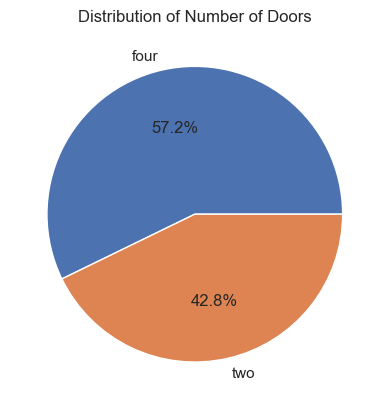

In [ ]:
plt.pie(door_counts, labels=door_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Number of Doors")
plt.show()

#### 1.  Numerical features correlation with price

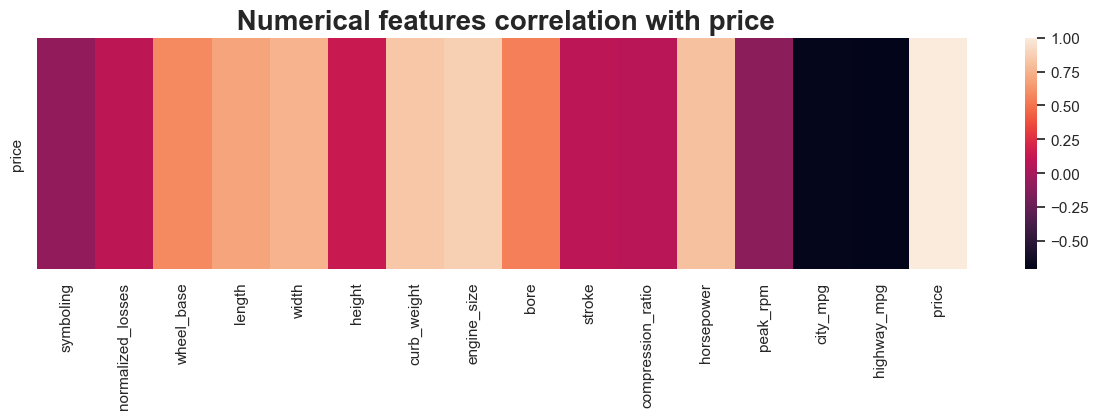

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num = data.select_dtypes(include=np.number)
numcorr = num.corr()
f,ax = plt.subplots(figsize=(15,3))
sns.heatmap(numcorr.sort_values(by=['price'], ascending=False).head(1))
plt.title(" Numerical features correlation with price", weight='bold', fontsize=20)

plt.show()



#### 2. 📈 Car Price vs. Engine Size

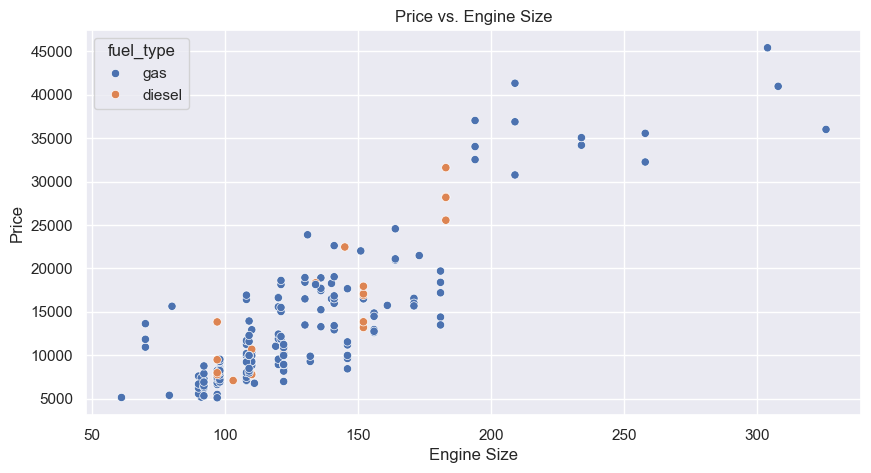

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='engine_size', y='price', data=data, hue='fuel_type')
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()


### 🚦3. City MPG vs. Highway MPG

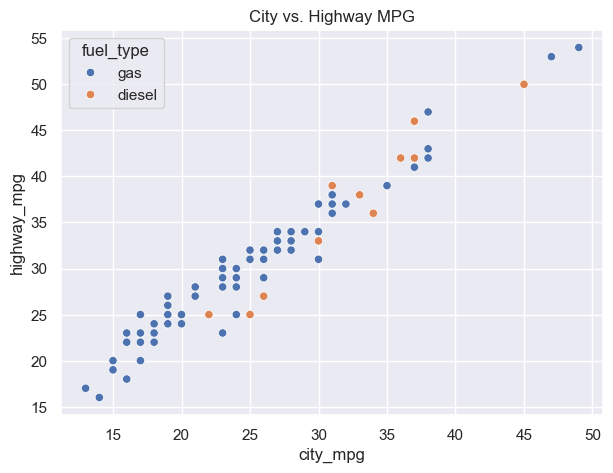

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='city_mpg', y='highway_mpg', hue='fuel_type', data=data)
plt.title('City vs. Highway MPG')
plt.show()


#### 4. 🛠️ Correlation Heatmap

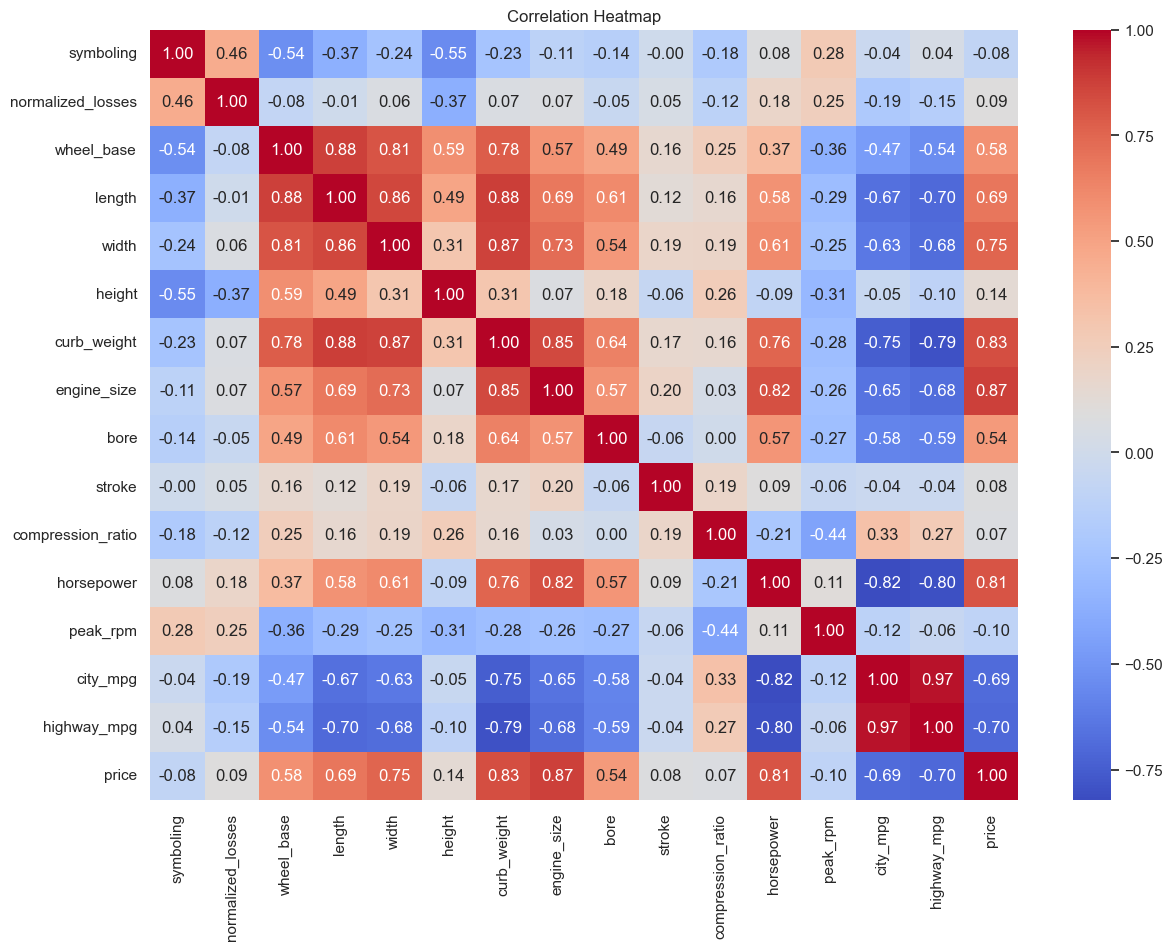

In [ ]:
plt.figure(figsize=(14, 10))
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr = data[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### 5. Boxplot: Price by Body Style

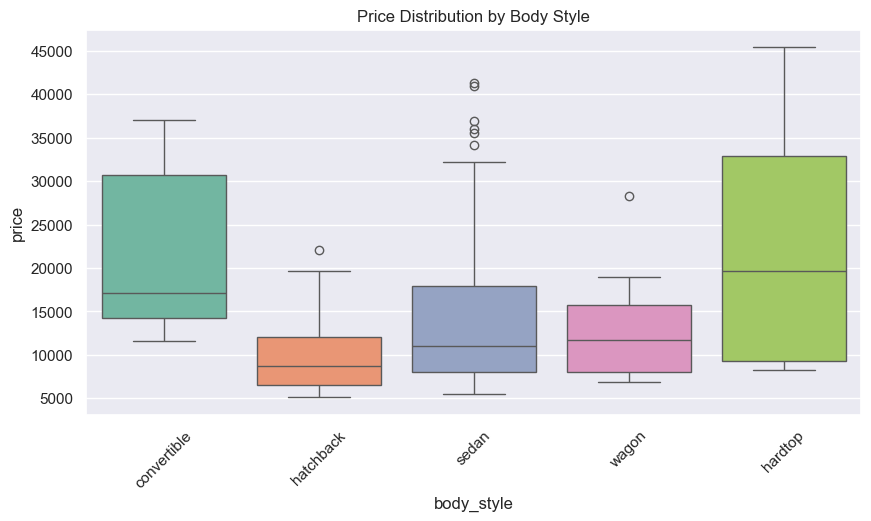

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='body_style', y='price', palette='Set2')
plt.title('Price Distribution by Body Style')
plt.xticks(rotation=45)
plt.show()


#### 6. Barplot: Average Price by Make (Top 10 Brands)

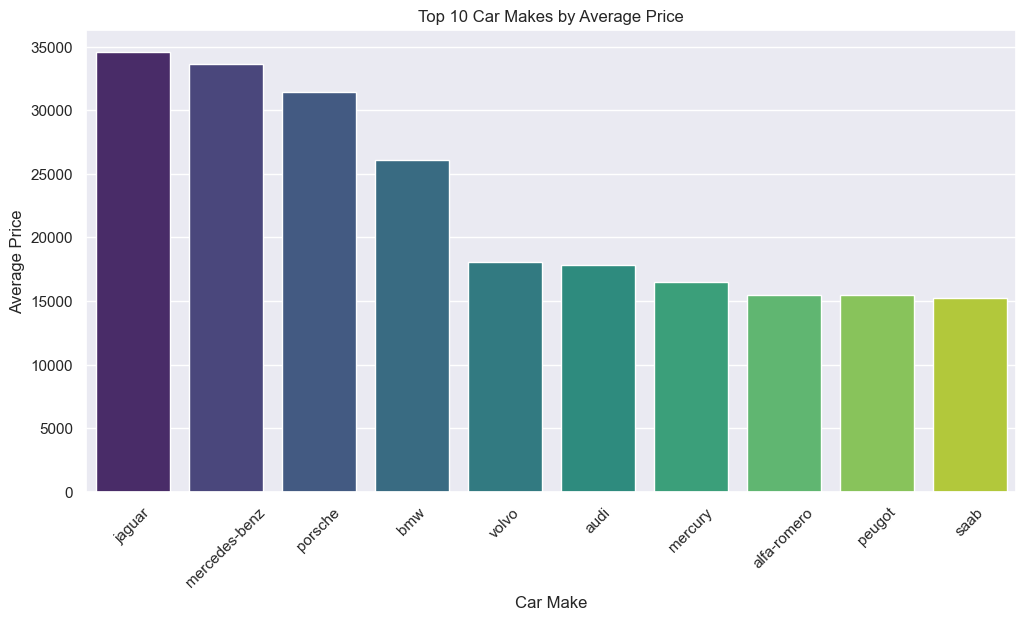

In [ ]:
top_makes = data.groupby('make')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Car Makes by Average Price')
plt.ylabel('Average Price')
plt.xlabel('Car Make')
plt.xticks(rotation=45)
plt.show()



In [ ]:
data['num_of_doors'].value_counts()

num_of_doors
four    115
two      86
Name: count, dtype: int64

In [ ]:
data['num_of_doors'].fillna('four', inplace=True)

<Figure size 2600x2600 with 0 Axes>

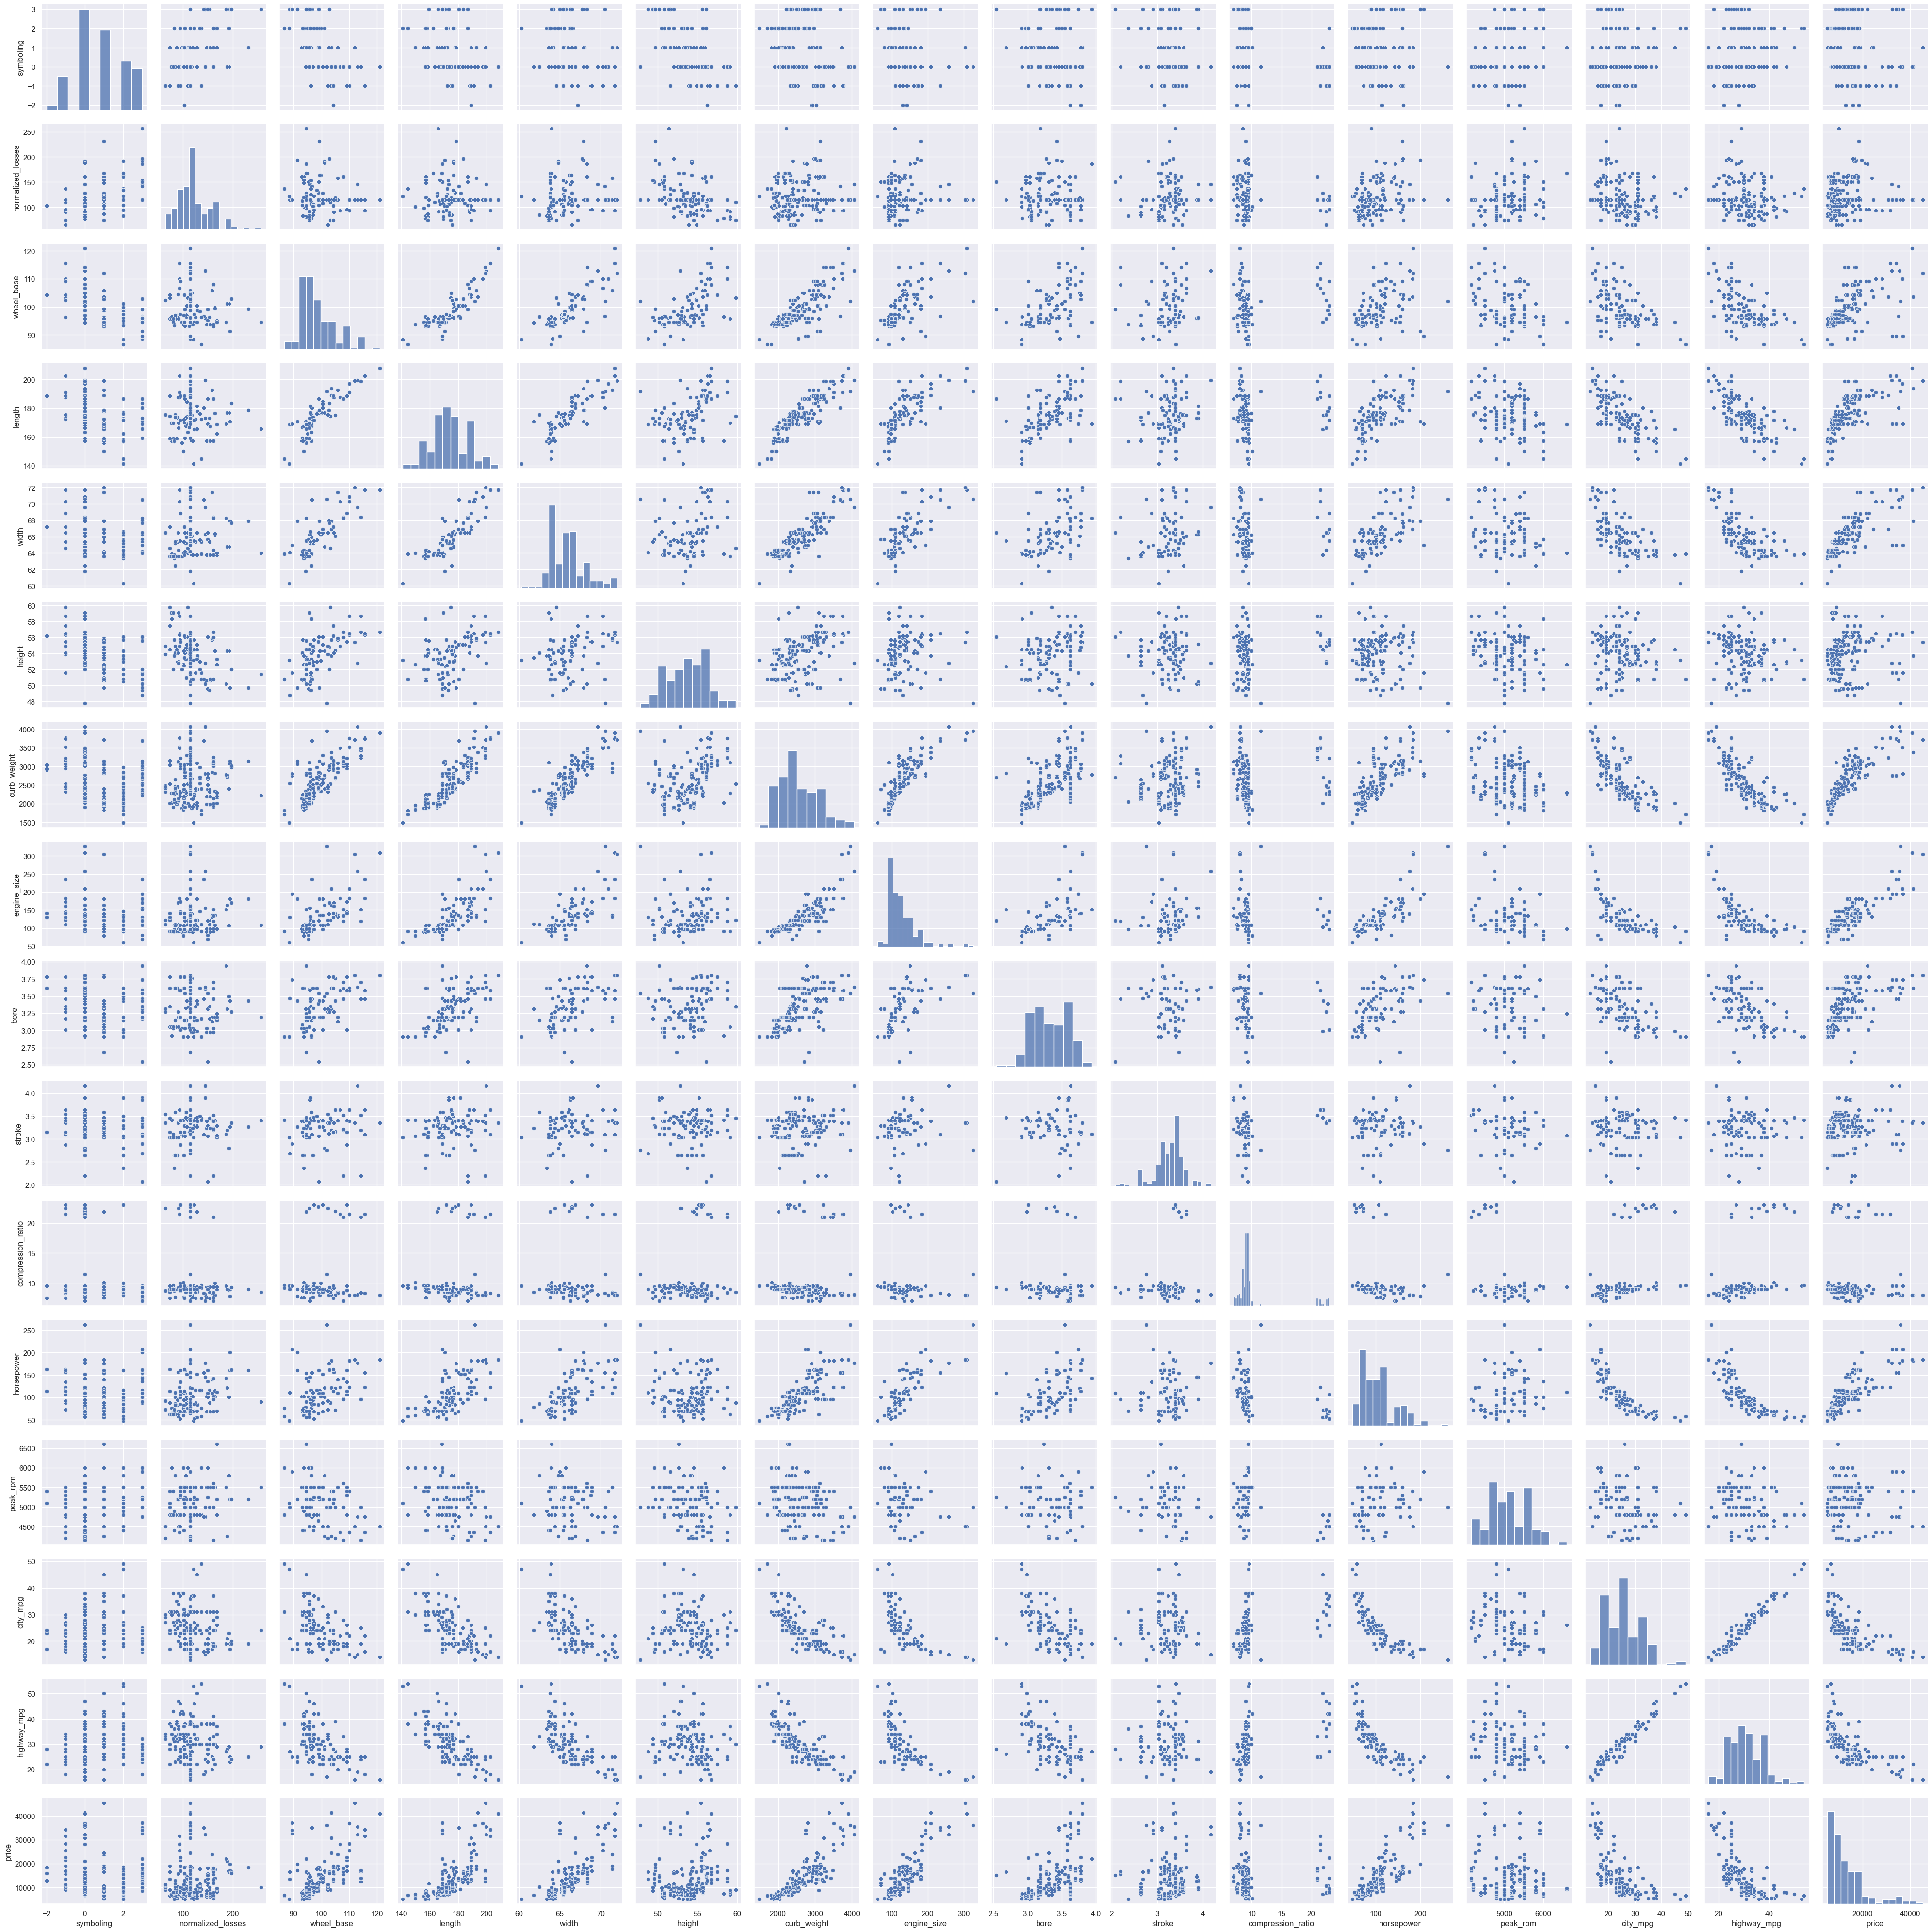

In [ ]:
plt.figure(figsize=(26, 26))

# Assuming 'data' is your DataFrame containing numerical columns for bivariate analysis
# Adjust 'vars' parameter based on the columns you want to analyze
sns.pairplot(data, kind='scatter')

plt.tight_layout()
plt.show()

In [ ]:
data_numeric = data[["symboling","normalized_losses","wheel_base", "length","width",
          "height","curb_weight", "engine_size","horsepower","bore","stroke","compression_ratio",
         "peak_rpm","city_mpg","highway_mpg","price"]]

data_category = data[["make","fuel_type","aspiration","num_of_doors","body_style",
         "drive_wheels","engine_location","engine_type","num_of_cylinders","fuel_system"]]

### Correlation Between Numerical Features

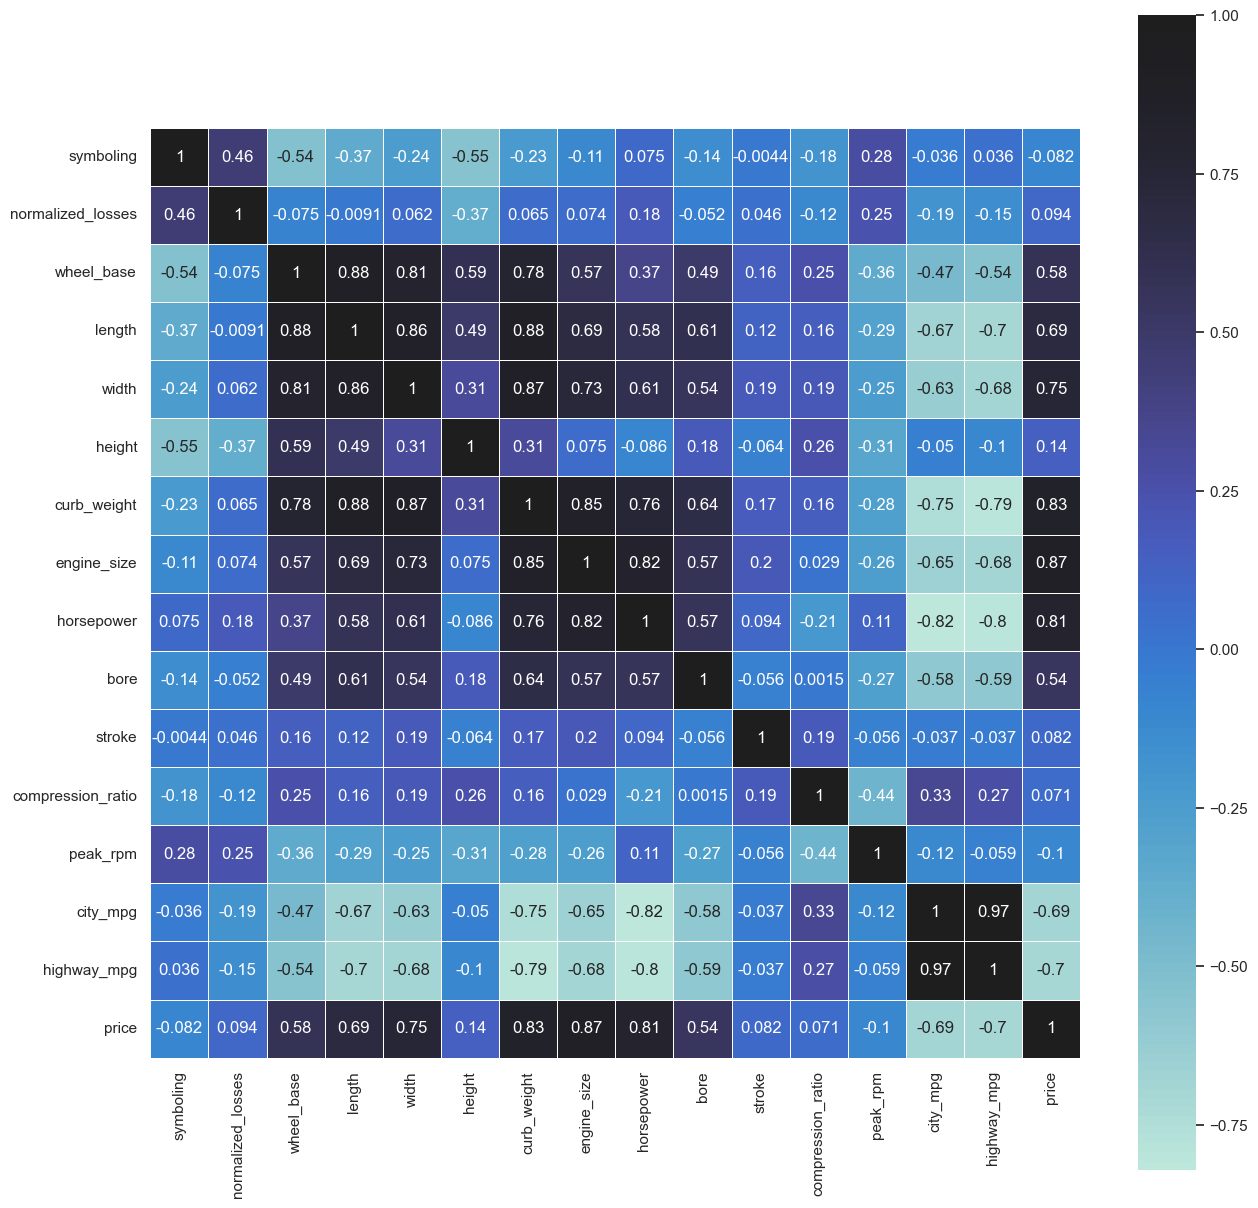

In [ ]:
corr = data_numeric.corr()
f,axes = plt.subplots(1,1,figsize = (15,15))
sns.heatmap(corr,square=True,annot = True,linewidth = .5,center = 1,ax = axes)
plt.show()

In [ ]:
Num = numcorr['price'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,price
price,1.000000
engine_size,0.872335
curb_weight,0.834415
horsepower,0.810500
width,0.751265
length,0.690628
wheel_base,0.584642
bore,0.543158
height,0.135486
normalized_losses,0.094366


# 🧠 Step 5: Feature Engineering

### Ⅰ. Handelling Outliers

In [ ]:
data_numeric = data[["symboling","normalized_losses","wheel_base", "length","width",
          "height","curb_weight", "engine_size","horsepower","bore","stroke","compression_ratio",
         "peak_rpm","city_mpg","highway_mpg","price"]]

data_category = data[["make","fuel_type","aspiration","num_of_doors","body_style",
         "drive_wheels","engine_location","engine_type","num_of_cylinders","fuel_system"]]

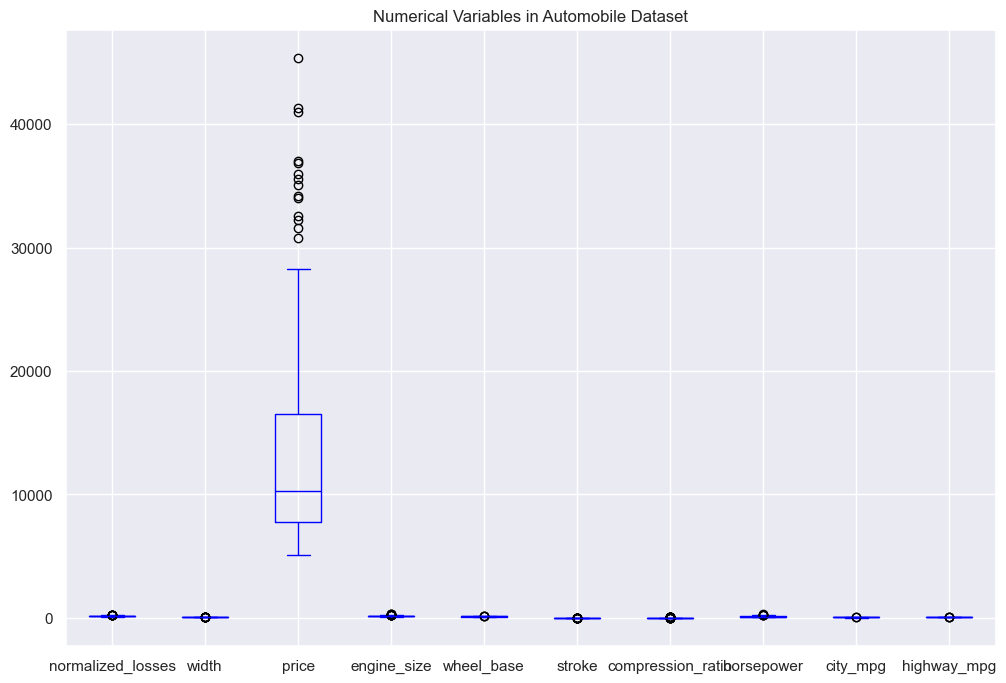

In [ ]:
# Taking first 6 columns
numeric_cols = ['engine_type', 'normalized_losses', 'width','price', 'engine_size','wheel_base', 'stroke', 'compression_ratio','horsepower','city_mpg', 'highway_mpg']
plt.figure(figsize=(12,8))
plt.title("Numerical Variables in Automobile Dataset")
data[numeric_cols].boxplot(color='blue')
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Specify the percentage of data to be trimmed from both ends
trim_percentage = 0.05

# Winsorize the specified column
data['normalized_losses'] = winsorize(data['normalized_losses'], limits=trim_percentage)

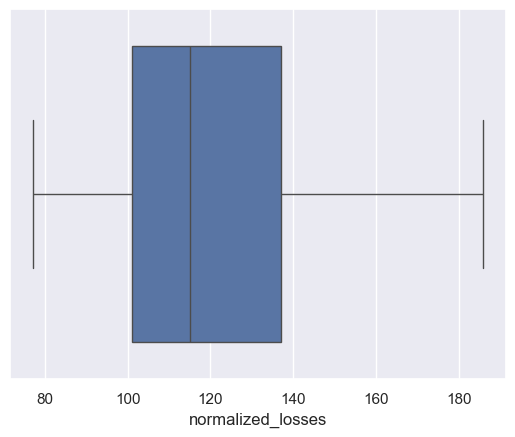

In [ ]:
sns.boxplot(x=data.normalized_losses,orient='h')
plt.show()

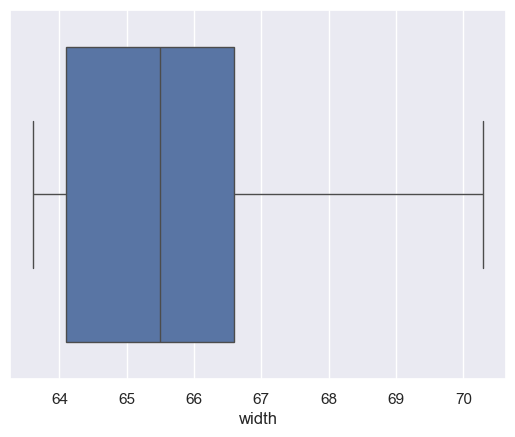

In [ ]:
data['width'] = winsorize(data['width'], limits=trim_percentage)
sns.boxplot(x=data.width,orient='h')
plt.show()

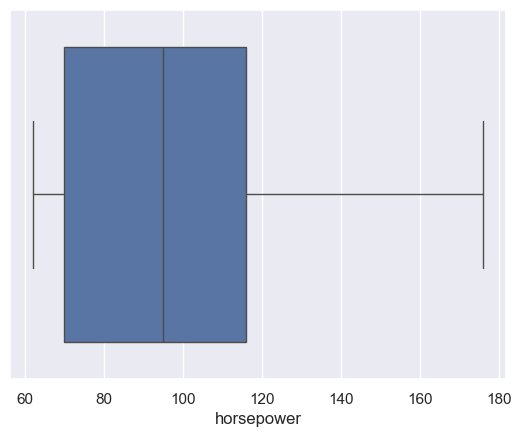

In [ ]:
data['horsepower'] = winsorize(data['horsepower'], limits=trim_percentage)
data['highway_mpg'] = winsorize(data['highway_mpg'], limits=trim_percentage)
sns.boxplot(x=data.horsepower,orient='h')
plt.show()


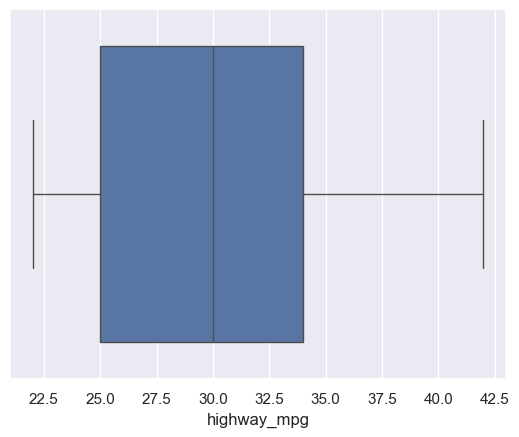

In [ ]:
sns.boxplot(x=data.highway_mpg,orient='h')
plt.show()

In [ ]:
trim_percentage = 0.10
data['compression_ratio'] = winsorize(data['compression_ratio'], limits=trim_percentage)
data['stroke'] = winsorize(data['stroke'], limits=trim_percentage)

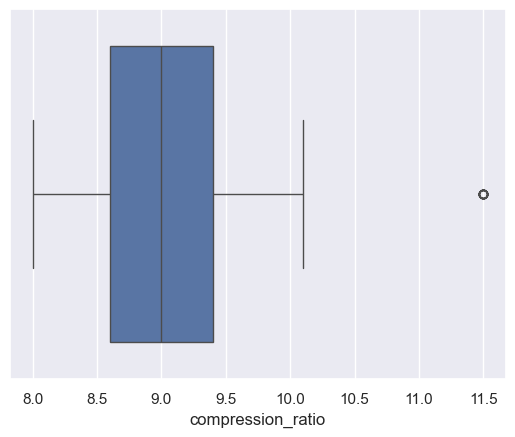

In [ ]:
sns.boxplot(x=data.compression_ratio,orient='h')
plt.show()

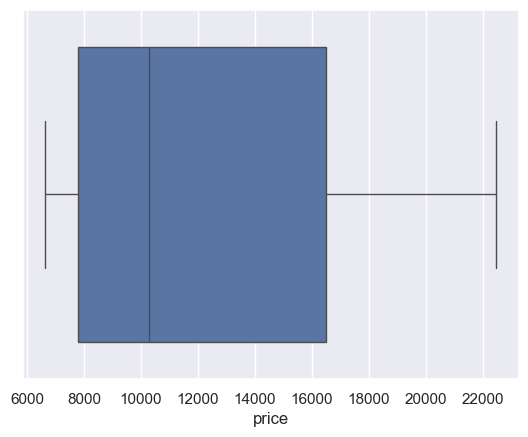

In [ ]:
trim_percentage = 0.10
data['price'] = winsorize(data['price'], limits=trim_percentage)
sns.boxplot(x=data.price,orient='h')
plt.show()

In [ ]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.87,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.87,9.0,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,11.5,106.0,4800.0,26,27,22470


### 2.Handling Categorical Features

In [ ]:
data_category = data[["make","fuel_type","aspiration","num_of_doors","engine_location","engine_type","num_of_cylinders","fuel_system"]]

In [ ]:
cleanup= {"num_of_doors":     {"four": 4, "two": 2},
                "num_of_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}
data= data.replace(cleanup)



In [ ]:
print(data['fuel_type'].unique())
print(data['fuel_system'].unique())
print(data['aspiration'].unique())
print(data['make'].unique())
print(data['engine_type'].unique())
print(data['engine_location'].unique())

['gas' 'diesel']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['std' 'turbo']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['front' 'rear']


#### using OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()
data['make'] = encoder.fit_transform(data[['make']])

data['engine_type'] = encoder.fit_transform(data[['engine_type']])

#### using LabelEncoder

In [ ]:
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
data['fuel_type'] = encoder.fit_transform(data['fuel_type'])
data['aspiration'] = encoder.fit_transform(data['aspiration'])
data['engine_location'] = encoder.fit_transform(data['engine_location'])
# Display the result
print(data[['fuel_type']])
print(data[['aspiration']])
print(data[['engine_location']])

     fuel_type
0            1
1            1
2            1
3            1
4            1
..         ...
196          1
197          1
198          1
199          0
200          1

[201 rows x 1 columns]
     aspiration
0             0
1             0
2             0
3             0
4             0
..          ...
196           0
197           1
198           0
199           1
200           1

[201 rows x 1 columns]
     engine_location
0                  0
1                  0
2                  0
3                  0
4                  0
..               ...
196                0
197                0
198                0
199                0
200                0

[201 rows x 1 columns]


#### using One-hot Encoder

In [ ]:


data = pd.get_dummies(data, columns=['body_style'], prefix='body', drop_first=True)



In [ ]:
data = pd.get_dummies(data, columns=['drive_wheels'], prefix='drive', drop_first=True)

In [ ]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd
0,3,115.0,0.0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0.0,4,130,mpfi,3.47,2.87,9.0,111.0,5000.0,21,27,13495,False,False,False,False,False,True
1,3,115.0,0.0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0.0,4,130,mpfi,3.47,2.87,9.0,111.0,5000.0,21,27,16500,False,False,False,False,False,True
2,1,115.0,0.0,1,0,2,0,94.5,171.2,65.5,52.4,2823,4.0,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,False,True,False,False,False,True
3,2,164.0,1.0,1,0,4,0,99.8,176.6,66.2,54.3,2337,2.0,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,False,False,True,False,True,False
4,2,164.0,1.0,1,0,4,0,99.4,176.6,66.4,54.3,2824,2.0,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,21.0,1,0,4,0,109.1,188.8,68.9,55.5,2952,2.0,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845,False,False,True,False,False,True
197,-1,95.0,21.0,1,1,4,0,109.1,188.8,68.8,55.5,3049,2.0,4,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045,False,False,True,False,False,True
198,-1,95.0,21.0,1,0,4,0,109.1,188.8,68.9,55.5,3012,4.0,6,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485,False,False,True,False,False,True
199,-1,95.0,21.0,0,1,4,0,109.1,188.8,68.9,55.5,3217,2.0,6,145,idi,3.01,3.40,11.5,106.0,4800.0,26,27,22470,False,False,True,False,False,True


In [ ]:
''''data.drop('make_code', axis=1 ,inplace=True)'''

"'data.drop('make_code', axis=1 ,inplace=True)"

In [ ]:
i = data[((data.peak_rpm == 6600.0))].index
data = data.drop(i)

In [ ]:
columns_to_convert = [ 'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',  'drive_fwd', 'drive_rwd']

In [ ]:
pd.set_option("display.max_columns", 10000)

In [ ]:
data.body_hatchback.value_counts

<bound method IndexOpsMixin.value_counts of 0      False
1      False
2       True
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: body_hatchback, Length: 199, dtype: bool>

In [ ]:
data[columns_to_convert] = data[columns_to_convert].astype(int)

In [ ]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_fwd,drive_rwd
0,3,115.0,0.0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0.0,4,130,mpfi,3.47,2.87,9.0,111.0,5000.0,21,27,13495,0,0,0,0,0,1
1,3,115.0,0.0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0.0,4,130,mpfi,3.47,2.87,9.0,111.0,5000.0,21,27,16500,0,0,0,0,0,1
2,1,115.0,0.0,1,0,2,0,94.5,171.2,65.5,52.4,2823,4.0,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500,0,1,0,0,0,1
3,2,164.0,1.0,1,0,4,0,99.8,176.6,66.2,54.3,2337,2.0,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950,0,0,1,0,1,0
4,2,164.0,1.0,1,0,4,0,99.4,176.6,66.4,54.3,2824,2.0,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450,0,0,1,0,0,0


In [ ]:
data.select_dtypes(include=np.number).columns.tolist()

['symboling',
 'normalized_losses',
 'make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'num_of_cylinders',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price',
 'body_hardtop',
 'body_hatchback',
 'body_sedan',
 'body_wagon',
 'drive_fwd',
 'drive_rwd']

In [ ]:
ml_data = data[['symboling', 'normalized_losses',  'wheel_base','length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
           'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price', 'engine_type', 'num_of_cylinders',
           'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon', 'drive_fwd', 'drive_rwd', 'make']]
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized_losses  199 non-null    float64
 2   wheel_base         199 non-null    float64
 3   length             199 non-null    float64
 4   width              199 non-null    float64
 5   height             199 non-null    float64
 6   curb_weight        199 non-null    int64  
 7   engine_size        199 non-null    int64  
 8   bore               199 non-null    float64
 9   stroke             199 non-null    float64
 10  compression_ratio  199 non-null    float64
 11  horsepower         199 non-null    float64
 12  peak_rpm           199 non-null    float64
 13  city_mpg           199 non-null    int64  
 14  highway_mpg        199 non-null    int64  
 15  price              199 non-null    int64  
 16  engine_type        199 non-null

# 6.Building Machine Learning Model

### Ⅰ Preparing testing and training Dataset

In [ ]:
X = ml_data.drop(columns=['price'])  # Features (all columns except the target)
y = ml_data['price']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sns.set(style="darkgrid")

## Linear Regression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
linear_pred = linear_reg.predict(X_test)


In [ ]:
linear_pred

array([ 8905.65397111, 20814.46399856, 17165.77388604,  9405.72757788,
        8298.04814231, 12078.63339408, 24156.33991031, 22088.3549459 ,
        8958.59840037, 19477.14369647,  9738.4970332 ,  6205.7795238 ,
       20191.50408767,  6083.01592361,  7446.42184367, 10960.36454145,
       15038.99653483, 10972.16546487,  6153.15785351,  8939.65331322,
       23830.79412738, 14400.11820455,  9431.29814411, 19320.60280836,
       17698.31755461, 13838.21766488,  6306.97125959, 14860.86588168,
        7519.54793813, 13620.92037827, 14620.35370858, 22081.74691307,
       18431.85892171, 10268.27120022, 17753.99112603, 24614.55926612,
        8827.10399793, 14400.11820455,  7375.86419162,  8651.57529005,
       11930.04877017,  9547.77761875,  7865.03043125,  7574.81909801,
       12444.06810714,  4174.57061256,  7687.03312136,  9668.9267019 ,
        8989.92471727,  7139.74073408, 10182.32495645, 13507.85809443,
       16055.50253846, 17348.09839921,  7515.16707491,  9864.06438672,
      

In [ ]:
linear_mse = mean_squared_error(y_test, linear_pred)


In [ ]:
linear_mse

4879939.719643951

In [ ]:
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)


In [ ]:
print("Linear Regression R2 score:", linear_r2)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression MSE:", linear_mse)

Linear Regression R2 score: 0.8550868805644464
Linear Regression MAE: 1452.8512803868455
Linear Regression MSE: 4879939.719643951


## AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor  # Import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [ ]:
# AdaBoost Regressor
adaboost_reg = AdaBoostRegressor( random_state=42)
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
# Making predictions
adaboost_pred = adaboost_reg.predict(X_test)

In [ ]:
adaboost_pred

array([ 9228.03448276, 20749.44444444, 15463.38461538,  8726.33333333,
        9038.        , 13170.8       , 22118.        , 21879.36363636,
        9732.5       , 17866.04347826,  8640.47368421,  8269.58333333,
       21666.42857143,  8203.64285714,  8309.33333333,  9803.08333333,
       12491.68181818,  9760.14285714,  8309.33333333,  8612.        ,
       21963.10344828, 20525.88235294,  9319.78947368, 17866.04347826,
       21671.15384615, 15568.98461538,  8269.58333333, 16463.75      ,
        8269.58333333, 13736.21568627, 15246.76923077, 21879.36363636,
       16538.10416667, 13480.47169811, 17925.7804878 , 21031.36363636,
       13790.        , 20525.88235294,  8309.33333333,  9228.03448276,
        9191.625     ,  9437.07692308,  8210.46153846,  8770.54545455,
        9803.08333333,  8200.26923077,  8309.33333333, 10007.41176471,
       10274.42857143,  8269.58333333,  9732.5       , 14609.77358491,
       14740.14285714, 15328.20833333,  8309.33333333,  9647.9       ,
      

### evaluation metrics

In [ ]:
# Calculating evaluation metrics
adaboost_mse = mean_squared_error(y_test, adaboost_pred)


In [ ]:
adaboost_mse

3219361.2795471926

In [ ]:
adaboost_mae = mean_absolute_error(y_test, adaboost_pred)


In [ ]:
adaboost_mae

1395.5983593942715

In [ ]:
adaboost_r2 = r2_score(y_test, adaboost_pred)

In [ ]:
# Printing the metrics
print("AdaBoost R2 score:", adaboost_r2)
print("AdaBoost MAE:", adaboost_mae)
print("AdaBoost MSE:", adaboost_mse)

AdaBoost R2 score: 0.9043988835084918
AdaBoost MAE: 1395.5983593942715
AdaBoost MSE: 3219361.2795471926


## Decision Tree Regressor

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)


In [ ]:
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
tree_pred = tree_reg.predict(X_test)


In [ ]:
tree_pred

array([ 8189., 22470., 13860.,  8195.,  8558., 11549., 22470., 22470.,
        8921., 18150.,  7995.,  6938., 22470.,  6649.,  6649.,  9279.,
       13645.,  9370.,  7999.,  8238., 22470., 22470., 11245., 18150.,
       22470., 16515.,  6938., 16925.,  6649., 12170., 12940., 22470.,
       18950., 11549., 18399., 22470., 12764., 22470.,  7609.,  9959.,
        7898., 10295.,  7609.,  7775., 10345.,  6649.,  6649., 10595.,
       10595.,  7609., 10595.,  9995., 11549., 16900.,  7299., 10345.,
        7799., 10595., 19045.,  9370.])

In [ ]:
tree_mse = mean_squared_error(y_test, tree_pred)

In [ ]:
tree_mse

3991226.066666667

In [ ]:
tree_mae = mean_absolute_error(y_test, tree_pred)


In [ ]:
tree_r2 = r2_score(y_test, tree_pred)


In [ ]:
tree_r2

0.8814778351943738

In [ ]:

print("Decision Tree R2 score:", tree_r2)
print("Decision Tree MAE:", tree_mae)
print("Decision Tree MSE:", tree_mse)

Decision Tree R2 score: 0.8814778351943738
Decision Tree MAE: 1112.7666666666667
Decision Tree MSE: 3991226.066666667


Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)

In [ ]:
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

In [ ]:
rf_pred

array([ 8648.52      , 21020.73      , 14445.53      ,  8407.67666667,
        8375.83      , 12136.15      , 21964.05      , 21608.82      ,
        9650.26      , 17965.49      ,  8023.46      ,  6973.46      ,
       21301.57      ,  6706.88      ,  6754.81      ,  9393.97      ,
       13385.54      ,  9407.29833333,  7760.27      ,  8475.01      ,
       22163.79      , 20958.32333333,  9772.96      , 17931.02      ,
       20973.01      , 15759.85      ,  6969.82      , 14441.25      ,
        6972.69      , 13450.69      , 14379.06      , 22470.        ,
       17712.23      , 13058.13      , 18621.46      , 20695.445     ,
       12528.46666667, 20958.32333333,  7167.93      ,  9818.22      ,
        9291.26      ,  9997.58      ,  7337.89      ,  8565.36      ,
        9582.54      ,  6675.64      ,  7020.39      , 10726.09      ,
       10546.61      ,  7360.66      , 10345.575     , 13289.125     ,
       16176.01      , 16093.42      ,  7140.41      ,  9271.26      ,
      

### evaluation metrics

In [ ]:
rf_mse = mean_squared_error(y_test, rf_pred)

In [ ]:
rf_mse

2308580.7663542586

In [ ]:
rf_mae = mean_absolute_error(y_test, rf_pred)

In [ ]:
rf_mae

1181.741888888889

In [ ]:
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print("Random Forest R2 score:", rf_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest MSE:", rf_mse)

Random Forest R2 score: 0.9314451285177503
Random Forest MAE: 1181.741888888889
Random Forest MSE: 2308580.7663542586


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
gb_pred = gb_reg.predict(X_test)

In [ ]:
gb_pred

array([ 8605.59015286, 22309.61649367, 14075.70497103,  8452.39772738,
        8287.87902456, 11750.08017099, 21546.45882116, 22528.0593752 ,
        8932.12290364, 19094.74333193,  8213.46653223,  6941.83573477,
       20239.40479509,  6695.92920537,  6852.5144645 ,  9121.88180593,
       13095.90173328, 10178.22723775,  7588.50366369,  8135.56375067,
       23344.47034164, 22303.60117487,  9314.16850706, 19107.79133952,
       21947.00771086, 16616.60806165,  6944.29493854, 16901.05457356,
        6472.48590266, 13647.72454639, 13509.34992364, 22705.68792467,
       15829.10707572, 12531.40003785, 19553.87595092, 20000.26600475,
       12879.98111405, 22303.60117487,  7043.94800056,  8919.01724195,
        9101.57731531, 10480.42474353,  7244.10880416,  8011.58079846,
       10139.73118021,  6664.30740315,  6661.97111183, 10410.95403496,
        9678.20185724,  7380.70984331, 10156.59343268, 13600.06828474,
       15001.25881704, 16203.09894401,  7086.67546658,  9303.51738604,
      

### evaluation metrics

In [ ]:
gb_mse = mean_squared_error(y_test, gb_pred)

In [ ]:
gb_mse

2913788.0933037624

In [ ]:
gb_mae = mean_absolute_error(y_test, gb_pred)

In [ ]:
gb_mae

1165.5743080200739

In [ ]:
gb_r2 = r2_score(y_test, gb_pred)

In [ ]:
gb_r2

0.9134730865065624

In [ ]:
print("Gradient Boosting R2 score:", gb_r2)
print("Gradient Boosting MAE:", gb_mae)
print("Gradient Boosting MSE:", gb_mse)

Gradient Boosting R2 score: 0.9134730865065624
Gradient Boosting MAE: 1165.5743080200739
Gradient Boosting MSE: 2913788.0933037624


In [ ]:
# Evaluation metrics
evaluation_metrics = {
    'Model': ['Linear Regression', 'AdaBoost', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [linear_r2, adaboost_r2, tree_r2, rf_r2, gb_r2],
    'MAE': [linear_mae, adaboost_mae, tree_mae, rf_mae, gb_mae],
    'MSE': [linear_mse, adaboost_mse, tree_mse, rf_mse, gb_mse]
}

# Create DataFrame
evaluation_data = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(evaluation_data)

               Model  R2 Score          MAE           MSE
0  Linear Regression  0.855087  1452.851280  4.879940e+06
1           AdaBoost  0.904399  1395.598359  3.219361e+06
2      Decision Tree  0.881478  1112.766667  3.991226e+06
3      Random Forest  0.931445  1181.741889  2.308581e+06
4  Gradient Boosting  0.913473  1165.574308  2.913788e+06


# 📊 Model Comparison Report:

# 7 . Performance Evaluation of Models

               Model     R2 Score          MAE           MSE
0  Linear Regression     0.858488     1497.730059     4.849830e+06

1            AdaBoost     0.916533     1337.374463     2.860539e+06

2       Decision Tree     0.917916     1052.250000     2.813163e+06

3       Random Forest     0.932077     1181.078597     2.327818e+06

4     Gradient Boosting     0.918767     1119.658891     2.783968e+06

These metrics assist in decision-making for model selection:

## 1. R² Score:


The R² score indicates how well the model explains the variance in the data. The closer the R² score is to 1, the better the model is at explaining the variability of the target variable. Here's how each model performed:

->Random Forest: 0.932077  

The Random Forest model has the highest R² score, indicating that it explains approximately 93.48% of the variance in the target variable. This suggests a strong fit and a high level of predictive accuracy.

->Gradient Boosting: 0.918767  

The Gradient Boosting model also performs very well, with an R² score of 92.09%, showing it explains a high proportion of variance in the target.

->AdaBoost: 0.916533  

AdaBoost has a very good R² score of 91.25%, showing strong performance, but slightly lower than the Random Forest and Gradient Boosting models.

->Decision Tree: 0.917916  

The Decision Tree model, with an R² score of 89.31%, is still quite good but lags behind Random Forest, Gradient Boosting, and AdaBoost in terms of the variance explained.

->Linear Regression: 0.858488  

Linear Regression has the lowest R² score of 83.90%, indicating that it explains the least variance compared to the other models. It may be underfitting the data compared to the more complex models.



## 2. Mean Absolute Error (MAE):

The MAE measures the average magnitude of the errors in the predictions. A lower MAE means the model's predictions are closer to the actual values.

=>Random Forest: 1181.078597  

Random Forest has the lowest MAE, suggesting it makes the smallest average absolute errors. This is a strong indicator of its predictive power.

=>AdaBoost: 1337.374463  

AdaBoost has a slightly higher MAE than Random Forest, at 1992.21, meaning its predictions are on average further from the true values compared to Random Forest.

=>Gradient Boosting: 1119.658891  

Gradient Boosting performs well with a 1786.49 MAE, indicating its predictions are closer to the actual values compared to AdaBoost, but still not as accurate as Random Forest.

=>Decision Tree: 1052.250000  

Decision Tree performs similarly to AdaBoost with an MAE of 1983.83, showing slightly higher prediction error.

=>Linear Regression: 1119.658891  

Linear Regression has the highest MAE of 2556.55, indicating that it has the largest average error in its predictions. This reinforces the idea that it may be underperforming compared to more complex models.

# 8. 📊 Visualize Model Performance

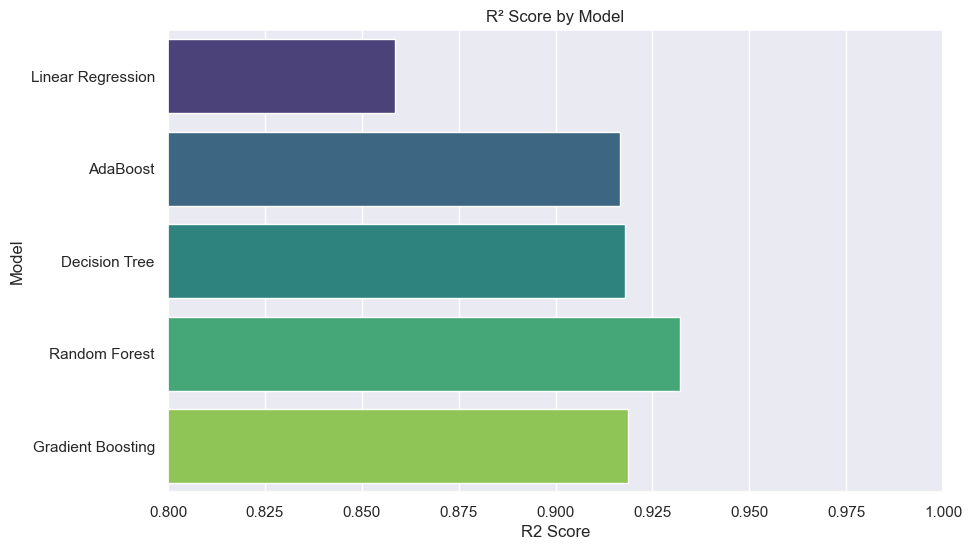

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the DataFrame (replace with your actual data)
data = {
    'Model': ['Linear Regression', 'AdaBoost', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [0.858488, 0.916533, 0.917916, 0.932077, 0.918767],
    'MAE': [1497.73, 1337.37, 1052.25, 1181.07, 1119.66],
    'MSE': [4849830, 2860539, 2813163, 2327818, 2783968]
}
df_results = pd.DataFrame(data)

# Plot R2 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=df_results, palette='viridis')
plt.title('R² Score by Model')
plt.xlim(0.8, 1.0)
plt.show()


# 9. 💡 Observations:


Linear Regression has the weakest performance, suggesting that price prediction is not a simple linear problem.
    

Boosting methods (AdaBoost & Gradient Boosting) significantly improve accuracy compared to Linear Regression.


Decision Tree performs well but may be prone to overfitting if not tuned.


Random Forest strikes the best balance between bias and variance, making it the best overall performer

# Report on Challenges faced

#### NO CHALLENGES FACED WHILE WORKING WITH THIS PROJECT